## Question 1

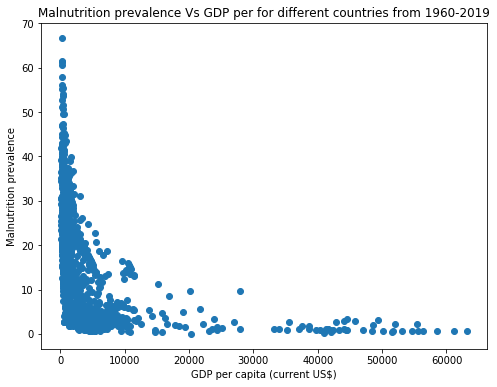

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
gdp_per_capita = pd.read_excel("GDP per cap.xls", sheet_name='Data', skiprows = 3).drop(['Country Name',
                                                                                                       'Country Code', 
                                                                                                       'Indicator Name', 
                                                                                                       'Indicator Code'], axis = 1)
 

malnutrition = pd.read_excel("malnutrition.xls", sheet_name='Data', skiprows = 3).drop(['Country Name',
                                                                                        'Country Code', 
                                                                                        'Indicator Name', 
                                                                                        'Indicator Code'], axis = 1)
plt.figure(figsize =(8,6))
plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Malnutrition prevalence");
plt.title("Malnutrition prevalence Vs GDP per for different countries from 1960-2019");
plt.scatter(gdp_per_capita, malnutrition);

In [542]:
gdp_region = pd.read_excel("GDP per cap.xls", sheet_name='Metadata - Countries')[["Region"]]
gdp_per_capita["Region"] = gdp_region

gdp_latin = gdp_per_capita[gdp_per_capita["Region"] == 'Latin America & Caribbean'].drop("Region", 1)
gdp_south_asia = gdp_per_capita[gdp_per_capita["Region"] == 'South Asia'].drop("Region", 1)
gdp_ssafrica = gdp_per_capita[gdp_per_capita["Region"] == 'Sub-Saharan Africa'].drop("Region", 1)
gdp_eurasia = gdp_per_capita[gdp_per_capita["Region"] == 'Europe & Central Asia'].drop("Region", 1)
gdp_middle_east_nafrica = gdp_per_capita[gdp_per_capita["Region"] == 'Middle East & North Africa'].drop("Region", 1)
gdp_east_asia_pacif = gdp_per_capita[gdp_per_capita["Region"] == 'East Asia & Pacific'].drop("Region", 1)

malnutrition_region = pd.read_excel("malnutrition.xls", sheet_name='Metadata - Countries')[["Region"]]
malnutrition["Region"] = malnutrition_region

malnutrition_latin = malnutrition[malnutrition["Region"] == 'Latin America & Caribbean'].drop("Region", 1)
malnutrition_south_asia = malnutrition[malnutrition["Region"] == 'South Asia'].drop("Region", 1)
malnutrition_ssafrica = malnutrition[malnutrition["Region"] == 'Sub-Saharan Africa'].drop("Region", 1)
malnutrition_eurasia = malnutrition[malnutrition["Region"] == 'Europe & Central Asia'].drop("Region", 1)
malnutrition_middle_east_nafrica = malnutrition[malnutrition["Region"] == 'Middle East & North Africa'].drop("Region", 1)
malnutrition_east_asia_pacific = malnutrition[malnutrition["Region"] == 'East Asia & Pacific'].drop("Region", 1)

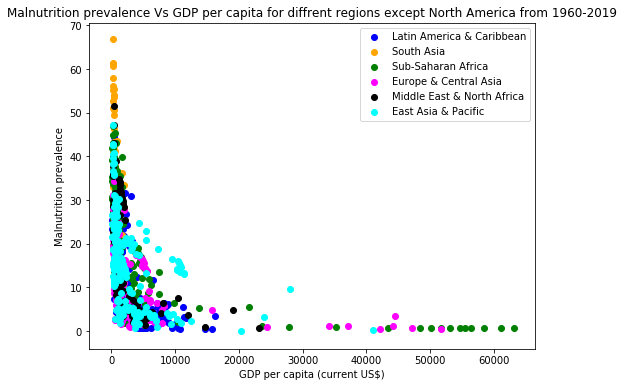

In [543]:
plt.figure(figsize =(8,6))
plt.scatter(gdp_latin, malnutrition_latin, color = 'blue', label = "Latin America & Caribbean");
plt.scatter(gdp_south_asia, malnutrition_south_asia, color = 'orange', label = 'South Asia');
plt.scatter(gdp_ssafrica, malnutrition_ssafrica, color = 'green', label = 'Sub-Saharan Africa');
plt.scatter(gdp_eurasia, malnutrition_eurasia, color = 'magenta', label = 'Europe & Central Asia');
plt.scatter(gdp_middle_east_nafrica, malnutrition_middle_east_nafrica, color = 'black', label = "Middle East & North Africa")
plt.scatter(gdp_east_asia_pacific, malnutrition_east_asia_pacific, color = 'cyan', label = 'East Asia & Pacific')

plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Malnutrition prevalence");
plt.title("Malnutrition prevalence Vs GDP per capita for diffrent regions except North America from 1960-2019");

plt.legend();

In [544]:
gdp_per_capita.drop("Region", 1, inplace = True)

gdp_income = pd.read_excel("GDP per cap.xls", sheet_name='Metadata - Countries')[["IncomeGroup"]]
gdp_per_capita["IncomeGroup"] = gdp_income

gdp_lower = gdp_per_capita[gdp_per_capita["IncomeGroup"] == 'Low income'].drop("IncomeGroup", 1)
gdp_lower_middle = gdp_per_capita[gdp_per_capita["IncomeGroup"] == 'Lower middle income'].drop("IncomeGroup", 1)
gdp_upper_middle = gdp_per_capita[gdp_per_capita["IncomeGroup"] == 'Upper middle income'].drop("IncomeGroup", 1)
gdp_high = gdp_per_capita[gdp_per_capita["IncomeGroup"] == 'High income'].drop("IncomeGroup", 1)

malnutrition.drop("Region", 1, inplace = True)
malnutrition_income = pd.read_excel("malnutrition.xls", sheet_name='Metadata - Countries')[["IncomeGroup"]]
malnutrition["IncomeGroup"] = malnutrition_income

malnutrition_lower = malnutrition[malnutrition["IncomeGroup"] == 'Low income'].drop("IncomeGroup", 1)
malnutrition_lower_middle = malnutrition[malnutrition["IncomeGroup"] == 'Lower middle income'].drop("IncomeGroup", 1)
malnutrition_upper_middle = malnutrition[malnutrition["IncomeGroup"] == 'Upper middle income'].drop("IncomeGroup", 1)
malnutrition_high = malnutrition[malnutrition["IncomeGroup"] == 'High income'].drop("IncomeGroup", 1)

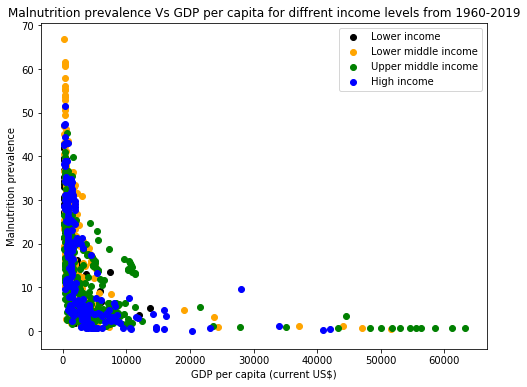

In [545]:
plt.figure(figsize =(8,6))
plt.scatter(gdp_lower, malnutrition_lower, color = 'black', label = "Lower income");
plt.scatter(gdp_lower_middle, malnutrition_lower_middle, color = 'orange', label = 'Lower middle income');
plt.scatter(gdp_upper_middle, malnutrition_upper_middle, color = 'green', label = 'Upper middle income');
plt.scatter(gdp_high, malnutrition_high, color = 'blue', label = 'High income');

plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Malnutrition prevalence");
plt.title("Malnutrition prevalence Vs GDP per capita for diffrent income levels from 1960-2019");

plt.legend();

## Question 2

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = 'yyet4bU_5ezK65Fz4oLo'
quandl.ApiConfig.api_version = '2015-04-09'

In [166]:
wheat_prices = quandl.get('ODA/PWHEAMT_USD')
crude_oil_prices = quandl.get('WGEC/WLD_CRUDE_WTI')
gold_prices = quandl.get('BUNDESBANK/BBK01_WT5511')

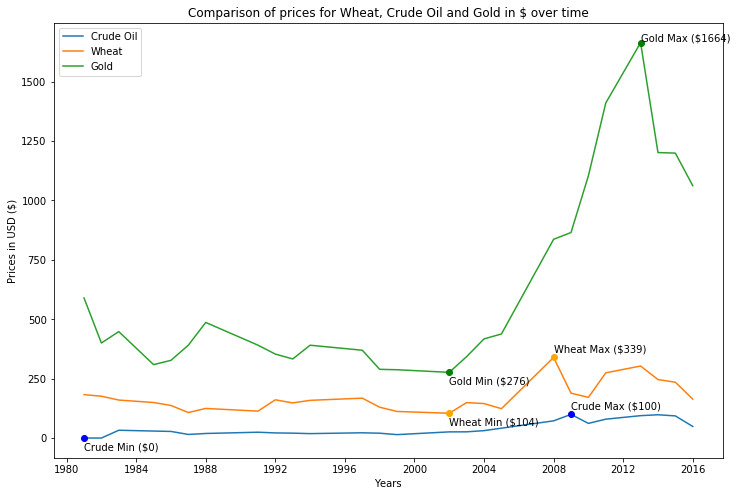

In [167]:
df1 = crude_oil_prices.merge(gold_prices, how='inner', right_index=True, left_index=True)
data = df1.merge(wheat_prices, how='inner', right_index=True, left_index=True)
data.columns = ["crude_oil", "gold", "wheat"]

plt.figure(figsize =(12,8))

plt.plot(data["crude_oil"], label = "Crude Oil");
plt.plot(data["wheat"], label = "Wheat");
plt.plot(data["gold"], label = "Gold");
plt.xlabel("Years")
plt.ylabel("Prices in USD ($)")
plt.title("Comparison of prices for Wheat, Crude Oil and Gold in $ over time")

gold_max = max(data.gold)
wheat_max = max(data.wheat)
crude_max = max(data.crude_oil)
x_gold = data.gold[data.gold == [gold_max]].index
x_crude = data.crude_oil[data.crude_oil == [crude_max]].index
x_wheat = data.wheat[data.wheat == [wheat_max]].index

plt.annotate("Gold Max ($" + str(round(max(data.gold))) + ")" , xy = (x_gold, gold_max), 
             xytext = (x_gold, gold_max +5))
plt.annotate("Crude Max ($" + str(round(max(data.crude_oil))) + ")" , xy = (x_crude, crude_max), 
             xytext = (x_crude, crude_max +20))
plt.annotate("Wheat Max ($" + str(round(max(data.wheat))) + ")" , xy = (x_wheat, wheat_max), 
             xytext = (x_wheat, wheat_max +20))


gold_min = min(data.gold)
wheat_min = min(data.wheat)
crude_min = min(data.crude_oil)
x_gold_min = data.gold[data.gold == [gold_min]].index
x_crude_ = data.crude_oil[data.crude_oil == [crude_min]].index
x_crude_min = pd.DatetimeIndex([x_crude_[0]])
x_wheat_min = data.wheat[data.wheat == [wheat_min]].index

plt.annotate("Gold Min ($" + str(round(min(data.gold))) + ")" , xy = (x_gold_min, gold_min), 
             xytext = (x_gold_min, gold_min -50))
plt.annotate("Crude Min ($" + str(round(min(data.crude_oil))) + ")" , xy = (data.index[0], crude_min), 
             xytext = (data.index[0], crude_min -50))
plt.annotate("Wheat Min ($" + str(round(min(data.wheat))) + ")" , xy = (x_wheat_min, wheat_min), 
             xytext = (x_wheat_min, wheat_min -50))

gold_x = [x_gold_min, x_gold]
gold_y = [gold_min, gold_max]
plt.plot(gold_x, gold_y, 'go');

wheat_x = [x_wheat_min, x_wheat]
wheat_y = [wheat_min, wheat_max]
plt.plot(wheat_x, wheat_y, 'o', color = "orange");

crude_x = [x_crude_min, x_crude]
crude_y = [crude_min, crude_max]
plt.plot(crude_x, crude_y, 'bo');

plt.legend();

## Question 3

In [298]:
import pandas as pd
import statistics as st

co2_emmision = pd.read_excel("CO2 emmision.xls", sheet_name='Data', skiprows = 3)
school_enrollment = pd.read_excel("School enonlement.xls", sheet_name='Data', skiprows = 3)
d = co2_emmision["2010"].describe()
d["5%"] = co2_emmision['2010'].quantile(0.05)
d["median"] = st.median(co2_emmision["2010"].dropna())
d["95%"] = co2_emmision['2010'].quantile(0.95)
data = {'Summary Statistic': ['mean', 'median', 'standard_dev', "5 percentile", '25 percentile', '75 percentile', '95 percentile'],
       'Values': [d[1], d[9], d[2], d[8], d[4], d[6], d[10]]}
co2_emmision_table = pd.DataFrame(data)
print("Table1 showing summary statistics for CO2 emissions (metric tons per capita) in 2010 for various countries\n")
co2_emmision_table


Table1 showing summary statistics for CO2 emissions (metric tons per capita) in 2010 for various countries



,Summary Statistic,Values
0,mean,4.846856
1,median,2.945495
2,standard_dev,5.821775
3,5 percentile,0.125587
4,25 percentile,0.832122
5,75 percentile,6.724730
6,95 percentile,15.552346


In [300]:
s = school_enrollment["2010"].describe()
s["5%"] = school_enrollment['2010'].quantile(0.05)
s["median"] = st.median(school_enrollment["2010"].dropna())
s["95%"] = school_enrollment['2010'].quantile(0.95)
data2 = {'Summary Statistic': ['mean', 'median', 'standard_dev', "5 percentile", '25 percentile', '75 percentile', '95 percentile'],
       'Values': [s[1], s[9], s[2], s[8], s[4], s[6], s[10]]}
school_enrollment_table = pd.DataFrame(data2)
print("Table2 showing summary statistics for School enrolment, primary (% net). in 2010 for various countries\n")
school_enrollment_table

Table2 showing summary statistics for School enrolment, primary (% net). in 2010 for various countries



,Summary Statistic,Values
0,mean,90.105088
1,median,92.956725
2,standard_dev,9.527627
3,5 percentile,66.656820
4,25 percentile,87.801005
5,75 percentile,95.934427
6,95 percentile,98.872787


## Question 4

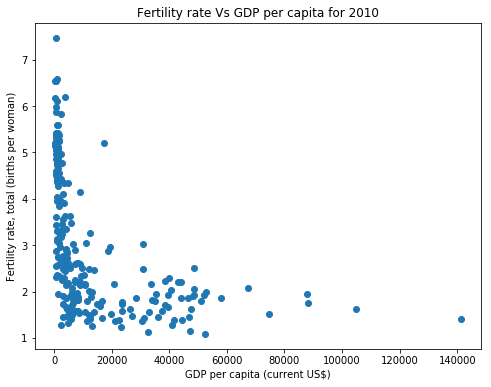

In [297]:
fertility_rate = pd.read_excel("fertility_rate.xls", sheet_name='Data', skiprows = 3)[["Country Name", "2010"]]
fertility_rate.set_index("Country Name", inplace = True)
fertility_rate.columns = ["Fertility 2010"]
gdp_per_cap = pd.read_excel("GDP per cap.xls", sheet_name='Data', skiprows = 3)[["Country Name", "2010"]]
gdp_per_cap.set_index("Country Name", inplace = True)
gdp_per_cap.columns = ["GDP 2010"]

merged = fertility_rate.merge(gdp_per_cap, how='inner', right_index=True, left_index=True)
merged.dropna()

plt.figure(figsize =(8,6))
plt.scatter(merged["GDP 2010"], merged["Fertility 2010"]);
plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Fertility rate, total (births per woman)");
plt.title("Fertility rate Vs GDP per capita for 2010");

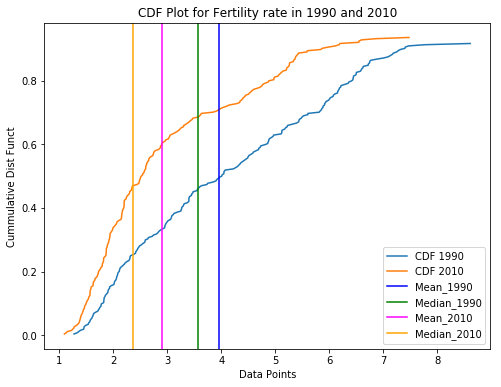

In [368]:
fertility_rate2 = pd.read_excel("fertility_rate.xls", sheet_name='Data', skiprows = 3)[["Country Name", "1990", "2010"]]
fertility_rate2.set_index("Country Name", inplace = True)
fertility_rate2.columns = ["1990","2010"]

plt.figure(figsize =(8,6))
cdf_1990 = fertility_rate2["1990"].value_counts().sort_index().cumsum() / fertility_rate2.shape[0]
cdf_1990.plot(label="CDF 1990");

cdf_2010 = fertility_rate2["2010"].value_counts().sort_index().cumsum() / fertility_rate2.shape[0]
cdf_2010.plot(label="CDF 2010");
plt.axvline(x=np.mean(fertility_rate2["1990"]), color="blue", label="Mean_1990")
plt.axvline(x=st.median(fertility_rate2["1990"].dropna()), color="green", label="Median_1990")
plt.axvline(x=np.mean(fertility_rate2["2010"]), color="magenta", label="Mean_2010")
plt.axvline(x=st.median(fertility_rate2["2010"].dropna()), color ="orange", label="Median_2010")
plt.title("CDF Plot for Fertility rate in 1990 and 2010")
plt.xlabel("Data Points")
plt.ylabel("Cummulative Dist Funct")
plt.legend()
plt.show()

## Question 5

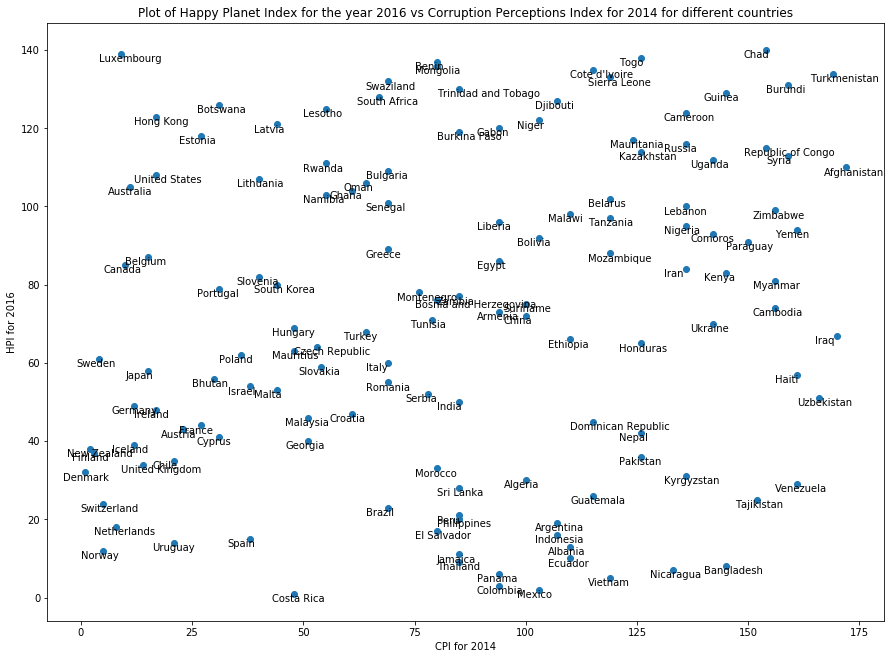

In [369]:
hpi_2016 = pd.read_excel("hpi-data-2016.xlsx", sheet_name='Complete HPI data', skiprows = 5)[["Country", "Region", "HPI Rank"]]
hpi_2016.set_index("Country", inplace = True)

cpi_2014 = pd.read_excel("CPI 2014_FullDataSet.xlsx", sheet_name='CPI 2014')[["Country/Territory", "Country Rank"]]
cpi_2014.set_index("Country/Territory", inplace = True)

merged = hpi_2016.merge(cpi_2014, how='inner', right_index=True, left_index=True)


plt.figure(figsize =(15,11))

label = [i for i in merged.index]

for i, txt in enumerate(label):
    plt.annotate(txt, (merged["Country Rank"][i], merged["HPI Rank"][i]), 
                 xytext = ((merged["Country Rank"][i]) -5 , (merged["HPI Rank"][i])-2))


plt.scatter(merged["Country Rank"], merged["HPI Rank"]);
plt.title("Plot of Happy Planet Index for the year 2016 vs Corruption Perceptions Index for 2014 for different countries");
plt.xlabel("CPI for 2014");
plt.ylabel("HPI for 2016");